In [11]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt

In [12]:
gas = ct.Solution('ffcm1_branching_reactions_theory.cti')


reaction_equations = gas.reaction_equations()
reaction_equations[gas.reaction_equations().index('H2 + OH <=> H + H2O')]
k1_index = gas.reaction_equations().index('H2 + OH <=> H + H2O')
constant = np.log10(6.0221409e+23)


In [13]:
reaction_equations

['2 OH (+M) <=> H2O2 (+M)',
 'H2O2 + OH <=> H2O + HO2',
 '2 HO2 <=> H2O2 + O2',
 'HO2 + OH <=> H2O + O2',
 '2 OH <=> H2O + O',
 'CH3 + HO2 <=> CH4 + O2',
 'CH3 + HO2 <=> CH3O + OH',
 'H + HO2 <=> 2 OH',
 'H + HO2 <=> H2O + OX',
 'H + HO2 <=> H2O + O',
 'H + HO2 <=> H2 + OX2',
 'H + HO2 <=> H2 + O2',
 'CH4 + OH <=> CH3 + H2O',
 'H + O2 <=> O + OH',
 'H2 + O <=> H + OH',
 'H2 + OH <=> H + H2O',
 'H2 + M <=> 2 H + M',
 'AR + H2 <=> AR + 2 H',
 'H2 + HE <=> 2 H + HE',
 '2 O + M <=> O2 + M',
 'AR + 2 O <=> AR + O2',
 'HE + 2 O <=> HE + O2',
 'H + O + M <=> OH + M',
 'H2O + M <=> H + OH + M',
 '2 H2O <=> H + H2O + OH',
 'H + O2 (+M) <=> HO2 (+M)',
 'HO2 + O <=> O2 + OH',
 'H + H2O2 <=> H2O + OH',
 'H + H2O2 <=> H2 + HO2',
 'H2O2 + O <=> HO2 + OH',
 'CO + O (+M) <=> CO2 (+M)',
 'CO + O2 <=> CO2 + O',
 'CO + OH <=> CO2 + H',
 'CO + OH <=> OCHO',
 'CO + HO2 <=> CO2 + OH',
 'HCO + M <=> CO + H + M',
 'H + HCO <=> CO + H2',
 'HCO + O <=> CO + OH',
 'HCO + O <=> CO2 + H',
 'HCO + OH <=> CO + H2O',

In [14]:

gas2 = ct.Solution('/Users/carlylagrotta/Dropbox/Columbia/MSI/data/branching_reaction_study/oh+h2_rate_constant/ffcm1_branching_reactions_testing_chebyshev.cti')

reaction_equations2 = gas2.reaction_equations()
reaction_equations2[gas2.reaction_equations().index('H2 + O <=> H + OH')]
k1_index2 = gas2.reaction_equations().index('H2 + O <=> H + OH')



In [15]:
#1
#P3 -> P4--
cheby_P3_P4_fit= np.array([-12.681659244674954, 1.8351766386151867, 0.40425557883272456, 0.10600971282704692])
cheby_P3_P4_fit[0] = cheby_P3_P4_fit[0]+constant


cheby_P3_P4_fit = cheby_P3_P4_fit.reshape((4,1))
zeros = np.zeros((4,1))
cheby_P3_P4_fit = np.hstack((cheby_P3_P4_fit,zeros))
cheby_P3_P4_fit

array([[11.09809167,  0.        ],
       [ 1.83517664,  0.        ],
       [ 0.40425558,  0.        ],
       [ 0.10600971,  0.        ]])

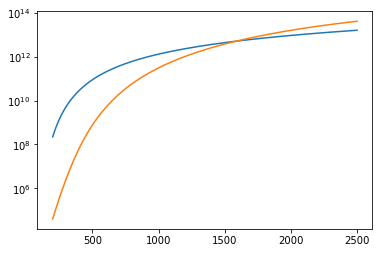

In [16]:
k1=[]
k1_2 = []
temp_list = np.arange(200,2500)
for temperature in np.arange(200,2500):
    gas.TPX = temperature,ct.one_atm,{'Ar':1}
    gas2.TPX = temperature,ct.one_atm,{'Ar':1}
    k1.append(gas.forward_rate_constants[k1_index]*1000)
    k1_2.append(gas2.forward_rate_constants[k1_index2]*1000)

plt.figure()
plt.semilogy(temp_list,k1)
plt.semilogy(temp_list,k1_2)